In [1]:
import numpy as np 
import pandas as pd
import requests
from groq import Groq
from datetime import datetime
import calendar

In [19]:
historic.json()['Meta Data']

{'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2009-01-30 19:45:00',
 '4. Interval': '15min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [20]:
historic.json()['Time Series (15min)'].keys()

dict_keys(['2009-01-30 19:45:00', '2009-01-30 19:30:00', '2009-01-30 19:15:00', '2009-01-30 19:00:00', '2009-01-30 18:45:00', '2009-01-30 18:30:00', '2009-01-30 18:15:00', '2009-01-30 18:00:00', '2009-01-30 17:45:00', '2009-01-30 17:30:00', '2009-01-30 17:15:00', '2009-01-30 17:00:00', '2009-01-30 16:45:00', '2009-01-30 16:30:00', '2009-01-30 16:15:00', '2009-01-30 16:00:00', '2009-01-30 15:45:00', '2009-01-30 15:30:00', '2009-01-30 15:15:00', '2009-01-30 15:00:00', '2009-01-30 14:45:00', '2009-01-30 14:30:00', '2009-01-30 14:15:00', '2009-01-30 14:00:00', '2009-01-30 13:45:00', '2009-01-30 13:30:00', '2009-01-30 13:15:00', '2009-01-30 13:00:00', '2009-01-30 12:45:00', '2009-01-30 12:30:00', '2009-01-30 12:15:00', '2009-01-30 12:00:00', '2009-01-30 11:45:00', '2009-01-30 11:30:00', '2009-01-30 11:15:00', '2009-01-30 11:00:00', '2009-01-30 10:45:00', '2009-01-30 10:30:00', '2009-01-30 10:15:00', '2009-01-30 10:00:00', '2009-01-30 09:45:00', '2009-01-30 09:30:00', '2009-01-30 09:15:00', 

In [21]:
historic.json()['Time Series (15min)']['2009-01-30 19:30:00']

{'1. open': '2.7202',
 '2. high': '2.7217',
 '3. low': '2.7202',
 '4. close': '2.7217',
 '5. volume': '116116'}

In [22]:
historic.json()['Time Series (15min)']['2009-01-30 19:30:00']['1. open']

'2.7202'

In [23]:
hDf = pd.DataFrame.from_dict((historic.json()['Time Series (15min)']))
hDf

2009-01-30 19:45:00 2009-01-30 19:30:00 2009-01-30 19:15:00  \
1. open                2.7178              2.7202              2.7166   
2. high                2.7211              2.7217              2.7202   
3. low                 2.7178              2.7202              2.7151   
4. close               2.7211              2.7217              2.7202   
5. volume               17220              116116               56196   

          2009-01-30 19:00:00 2009-01-30 18:45:00 2009-01-30 18:30:00  \
1. open                2.7166              2.7172              2.7175   
2. high                2.7166              2.7187              2.7175   
3. low                 2.7166              2.7157              2.7175   
4. close               2.7166              2.7157              2.7175   
5. volume                5600               58408                2800   

          2009-01-30 18:15:00 2009-01-30 18:00:00 2009-01-30 17:45:00  \
1. open                2.7172              2.7139              2.7142   
2. high                2.7202              2.7202              2.7142   
3. low                 2.7172              2.7139              2.7139   
4. close               2.7172              2.7202              2.7139   
5. volume               87164               37184                7364   

          2009-01-30 17:30:00  ... 2009-01-02 09:45:00 2009-01-02 09:30:00  \
1. open                2.7160  ...              2.6129              2.5792   
2. high                2.7160  ...              2.6298              2.6187   
3. low                 2.7142  ...              2.6102              2.5654   
4. close               2.7151  ...              2.6202              2.6126   
5. volume               83720  ...            40989884            41557445   

          2009-01-02 09:15:00 2009-01-02 09:00:00 2009-01-02 08:45:00  \
1. open                2.5888              2.5861              2.5711   
2. high                2.5888              2.5894              2.5907   
3. low                 2.5786              2.5711              2.5711   
4. close               2.5792              2.5894              2.5861   
5. volume              170296             1089285              157024   

          2009-01-02 08:30:00 2009-01-02 08:15:00 2009-01-02 08:00:00  \
1. open                2.5711              2.5861              2.5952   
2. high                2.5849              2.5861              2.5952   
3. low                 2.5711              2.5777              2.5711   
4. close               2.5825              2.5822              2.5861   
5. volume             1926121              249760              784728   

          2009-01-02 07:45:00 2009-01-02 07:30:00  
1. open                2.5907              2.5891  
2. high                2.5976              2.5891  
3. low                 2.5907              2.5891  
4. close               2.5952              2.5891  
5. volume               16800               18060  

[5 rows x 1035 columns]

In [24]:
hDf = hDf.transpose()
hDf

1. open 2. high  3. low 4. close 5. volume
2009-01-30 19:45:00  2.7178  2.7211  2.7178   2.7211     17220
2009-01-30 19:30:00  2.7202  2.7217  2.7202   2.7217    116116
2009-01-30 19:15:00  2.7166  2.7202  2.7151   2.7202     56196
2009-01-30 19:00:00  2.7166  2.7166  2.7166   2.7166      5600
2009-01-30 18:45:00  2.7172  2.7187  2.7157   2.7157     58408
...                     ...     ...     ...      ...       ...
2009-01-02 08:30:00  2.5711  2.5849  2.5711   2.5825   1926121
2009-01-02 08:15:00  2.5861  2.5861  2.5777   2.5822    249760
2009-01-02 08:00:00  2.5952  2.5952  2.5711   2.5861    784728
2009-01-02 07:45:00  2.5907  2.5976  2.5907   2.5952     16800
2009-01-02 07:30:00  2.5891  2.5891  2.5891   2.5891     18060

[1035 rows x 5 columns]

In [25]:
hDf = hDf.reset_index()
hDf= hDf.rename(columns={'index': 'date'})
hDf

date 1. open 2. high  3. low 4. close 5. volume
0     2009-01-30 19:45:00  2.7178  2.7211  2.7178   2.7211     17220
1     2009-01-30 19:30:00  2.7202  2.7217  2.7202   2.7217    116116
2     2009-01-30 19:15:00  2.7166  2.7202  2.7151   2.7202     56196
3     2009-01-30 19:00:00  2.7166  2.7166  2.7166   2.7166      5600
4     2009-01-30 18:45:00  2.7172  2.7187  2.7157   2.7157     58408
...                   ...     ...     ...     ...      ...       ...
1030  2009-01-02 08:30:00  2.5711  2.5849  2.5711   2.5825   1926121
1031  2009-01-02 08:15:00  2.5861  2.5861  2.5777   2.5822    249760
1032  2009-01-02 08:00:00  2.5952  2.5952  2.5711   2.5861    784728
1033  2009-01-02 07:45:00  2.5907  2.5976  2.5907   2.5952     16800
1034  2009-01-02 07:30:00  2.5891  2.5891  2.5891   2.5891     18060

[1035 rows x 6 columns]

In [26]:
pd.to_datetime(hDf['date'])

0      2009-01-30 19:45:00
1      2009-01-30 19:30:00
2      2009-01-30 19:15:00
3      2009-01-30 19:00:00
4      2009-01-30 18:45:00
               ...        
1030   2009-01-02 08:30:00
1031   2009-01-02 08:15:00
1032   2009-01-02 08:00:00
1033   2009-01-02 07:45:00
1034   2009-01-02 07:30:00
Name: date, Length: 1035, dtype: datetime64[ns]

In [37]:
def getHistoric(tik, interval, month): 
    global keyCalls, currentKey
    historic = requests.get(alphV, params=setParams(tik, interval, month))
    keyCalls+=1 
    if keyCalls>25: 
        currentKey+=1
    key = f"Time Series ({interval})"
    df = pd.DataFrame.from_dict(historic.json()[key]).transpose().reset_index().rename(columns={'index':'date'})
    df.columns = df.columns.str.replace(r'^\d+\.\s*', '', regex=True)
    df['date'] = pd.to_datetime(df['date'])
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)
    return df.sort_values(by='date', ascending= True).reset_index(drop=True)

In [104]:
df1 = getHistoric("GE", "15min", "2012-12")
df2 = getHistoric("GE", "15min", "2013-01")
df3 = getHistoric("GE", "15min", "2013-02")

In [125]:
df_merged = pd.concat([df1, df2, df3], ignore_index=True, sort=False)
df_merged

date     open   high     low   close     volume
0    2012-12-03 09:30:00  21.1800  21.23  21.130  21.130  2214894.0
1    2012-12-03 09:45:00  21.1400  21.14  21.000  21.030  1998468.0
2    2012-12-03 10:00:00  21.0200  21.08  20.950  21.060  1509230.0
3    2012-12-03 10:15:00  21.0550  21.08  21.040  21.040   733174.0
4    2012-12-03 10:30:00  21.0400  21.05  21.000  21.020   730718.0
...                  ...      ...    ...     ...     ...        ...
1550 2013-02-28 14:45:00  23.3145  23.32  23.260  23.270  1233188.0
1551 2013-02-28 15:00:00  23.2600  23.27  23.220  23.240  1603958.0
1552 2013-02-28 15:15:00  23.2400  23.28  23.215  23.260  1603574.0
1553 2013-02-28 15:30:00  23.2650  23.30  23.250  23.297  1530962.0
1554 2013-02-28 15:45:00  23.2950  23.32  23.210  23.210  3913327.0

[1555 rows x 6 columns]

In [148]:
contractInterval = df_merged[df_merged['date'].dt.strftime('%Y-%m-%d').str.contains("2013-01-02")]
contractInterval.head()

date    open   high    low   close     volume  log_returns  \
515 2013-01-02 09:30:00  21.510  21.54  21.29  21.300  4901040.0     0.014661   
516 2013-01-02 09:45:00  21.297  21.43  21.28  21.335  2277805.0     0.001642   
517 2013-01-02 10:00:00  21.340  21.38  21.28  21.304  2053754.0    -0.001454   
518 2013-01-02 10:15:00  21.301  21.34  21.26  21.320  1979064.0     0.000751   
519 2013-01-02 10:30:00  21.330  21.33  21.27  21.270  1600530.0    -0.002348   

     volatility_3  volatility_5  moving_avg2  moving_avg3  moving_avg4  \
515      0.162614      0.132404      21.1450    21.075000     21.00800   
516      0.175878      0.114276      21.3175    21.208333     21.14000   
517      0.041823      0.118083      21.3195    21.313000     21.23225   
518      0.029785      0.121126      21.3120    21.319667     21.31475   
519      0.041861      0.131917      21.2950    21.298000     21.30725   

         ewma2      ewma5     ewma10        rsi  
515  21.186082  21.030415  20.922485  86.339755  
516  21.285361  21.131943  20.997488  97.597043  
517  21.297787  21.189296  21.053217  94.454383  
518  21.312596  21.232864  21.101723  93.064877  
519  21.284199  21.245243  21.132319  81.674208

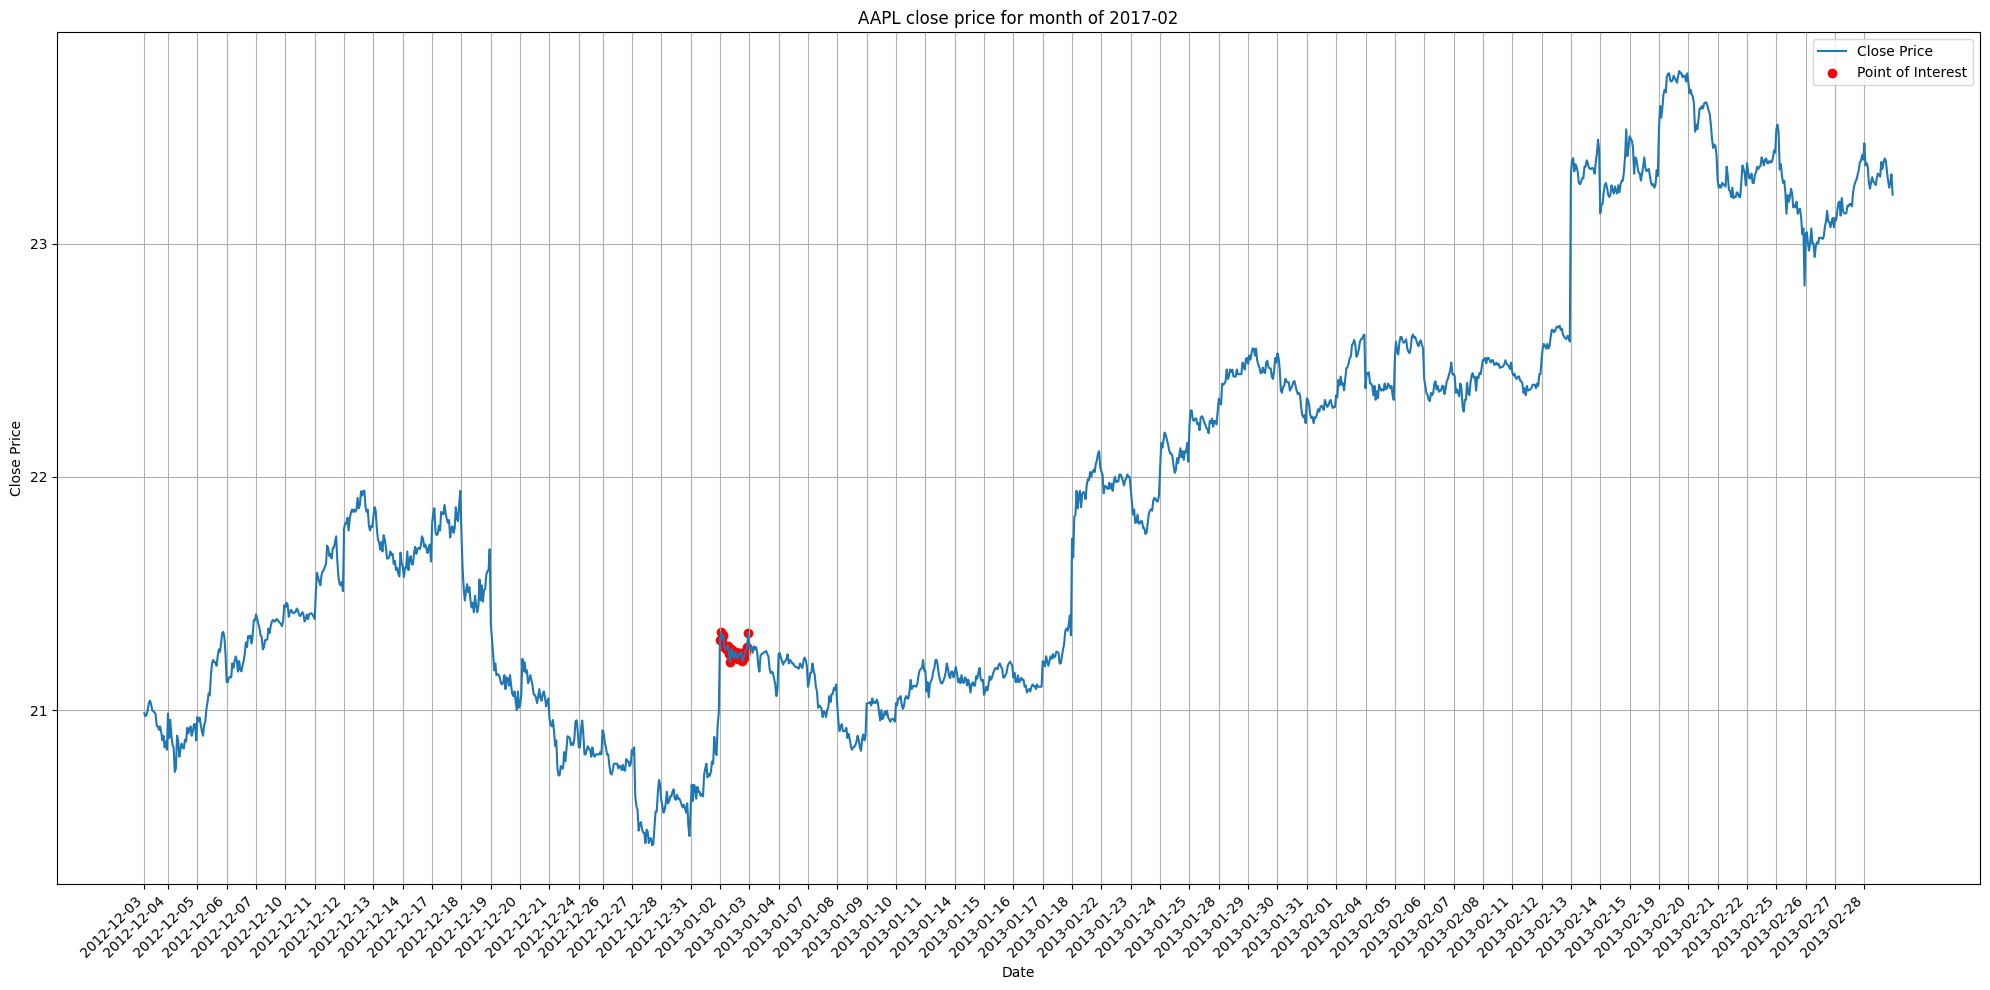

In [147]:
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(20, 10))

plt.plot(df_merged.index, df_merged['close'], label='Close Price')

y_min = df_merged['close'].min()
y_max = df_merged['close'].max()
y_ticks = list(range(math.ceil(y_min -1), math.ceil(y_max + 1.5), math.ceil(abs(y_max - y_min) / 5)))
plt.yticks(y_ticks)

unique_dates = df_merged['date'].dt.strftime('%Y-%m-%d').unique()
tick_positions = [df_merged[df_merged['date'].dt.strftime('%Y-%m-%d') == date].index[0] for date in unique_dates]
plt.xticks(ticks=tick_positions, labels=unique_dates, rotation=45, ha='right')
plt.scatter(contractInterval.index, contractInterval['close'], color='red', label='Point of Interest')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL close price for month of 2017-02')
plt.grid()

plt.tight_layout()
plt.legend()
plt.show()


In [127]:
df_merged['log_returns'] = np.log(df_merged['close'] / df_merged['close'].shift(1))
df_merged['volatility_3'] = df_merged['log_returns'].rolling(window=2).std() * np.sqrt(365) 
df_merged['volatility_5'] = df_merged['log_returns'].rolling(window=5).std() * np.sqrt(365) 

df_merged['moving_avg2'] = df_merged['close'].rolling(window=2).mean()
df_merged['moving_avg3'] = df_merged['close'].rolling(window=3).mean()
df_merged['moving_avg4'] = df_merged['close'].rolling(window=4).mean()


In [133]:
def calculate_rsi(data, window=5):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [134]:
df_merged['rsi'] = calculate_rsi(df_merged['close'])

/tmp/ipykernel_6458/889033482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['rsi'] = calculate_rsi(df_merged['close'])


In [128]:
df_merged['ewma2'] = df_merged['close'].ewm(span=2, adjust=False).mean()
df_merged['ewma5'] = df_merged['close'].ewm(span=5, adjust=False).mean()
df_merged['ewma10'] = df_merged['close'].ewm(span=10, adjust=False).mean()
df_merged = df_merged.dropna()
df_merged

date     open   high     low    close     volume  \
5    2012-12-03 10:45:00  21.0100  21.02  20.960  20.9863  1059154.0   
6    2012-12-03 11:00:00  20.9900  20.99  20.970  20.9736   537890.0   
7    2012-12-03 11:15:00  20.9775  20.99  20.970  20.9800   569549.0   
8    2012-12-03 11:30:00  20.9800  21.02  20.970  21.0000  1551761.0   
9    2012-12-03 11:45:00  21.0000  21.04  20.990  21.0300   452218.0   
...                  ...      ...    ...     ...      ...        ...   
1550 2013-02-28 14:45:00  23.3145  23.32  23.260  23.2700  1233188.0   
1551 2013-02-28 15:00:00  23.2600  23.27  23.220  23.2400  1603958.0   
1552 2013-02-28 15:15:00  23.2400  23.28  23.215  23.2600  1603574.0   
1553 2013-02-28 15:30:00  23.2650  23.30  23.250  23.2970  1530962.0   
1554 2013-02-28 15:45:00  23.2950  23.32  23.210  23.2100  3913327.0   

      log_returns  volatility_3  volatility_5  moving_avg2  moving_avg3  \
5       -0.001605      0.008828      0.042295     21.00315    21.015433   
6       -0.000605      0.013498      0.022070     20.97995    20.993300   
7        0.000305      0.012299      0.013319     20.97680    20.979967   
8        0.000953      0.008750      0.019394     20.99000    20.984533   
9        0.001428      0.006413      0.023271     21.01500    21.003333   
...           ...           ...           ...          ...          ...   
1550    -0.001717      0.003142      0.027122     23.29000    23.311833   
1551    -0.001290      0.005774      0.020342     23.25500    23.273333   
1552     0.000860      0.029048      0.021918     23.25000    23.256667   
1553     0.001589      0.009851      0.030843     23.27850    23.265667   
1554    -0.003741      0.072015      0.040732     23.25350    23.255667   

      moving_avg4      ewma2      ewma5     ewma10  
5       21.026575  21.000537  21.030824  21.061436  
6       21.004975  20.982579  21.011750  21.045466  
7       20.989975  20.980860  21.001166  21.033563  
8       20.984975  20.993620  21.000778  21.027461  
9       20.995900  21.017873  21.010518  21.027922  
...           ...        ...        ...        ...  
1550    23.325125  23.288445  23.311621  23.313649  
1551    23.293875  23.256148  23.287747  23.300258  
1552    23.270000  23.258716  23.278498  23.292938  
1553    23.266750  23.284239  23.284665  23.293677  
1554    23.251750  23.234746  23.259777  23.278463  

[1550 rows x 15 columns]

In [136]:
preContract = df_merged[
    (df_merged['date']>= pd.Timestamp("2012-12-16"))&
    (df_merged["date"] < pd.Timestamp("2013-01-02"))
]
postContract = df_merged[
    (df_merged['date']>= pd.Timestamp("2013-01-02"))&
    (df_merged['date']<= pd.Timestamp("2013-01-18"))
]

preContract

date     open    high    low    close     volume  \
260 2012-12-17 09:30:00  21.7200  21.800  21.69  21.7999  3225327.0   
261 2012-12-17 09:45:00  21.7950  21.878  21.79  21.8450  2360766.0   
262 2012-12-17 10:00:00  21.8400  21.910  21.83  21.8650  1947612.0   
263 2012-12-17 10:15:00  21.8625  21.880  21.75  21.7624  1216136.0   
264 2012-12-17 10:30:00  21.7670  21.830  21.75  21.7500  1323404.0   
..                  ...      ...     ...    ...      ...        ...   
510 2012-12-31 14:45:00  20.7700  20.910  20.76  20.8850  2299027.0   
511 2012-12-31 15:00:00  20.8820  20.930  20.82  20.8200  1862824.0   
512 2012-12-31 15:15:00  20.8200  20.870  20.79  20.8070  1761714.0   
513 2012-12-31 15:30:00  20.8000  20.950  20.80  20.9350  3748513.0   
514 2012-12-31 15:45:00  20.9350  21.000  20.91  20.9900  7726896.0   

     log_returns  volatility_3  volatility_5  moving_avg2  moving_avg3  \
260     0.007501      0.146829      0.076927     21.71845    21.715633   
261     0.002067      0.073408      0.074694     21.82245    21.760633   
262     0.000915      0.015557      0.074881     21.85500    21.836633   
263    -0.004703      0.075903      0.092453     21.81370    21.824133   
264    -0.000570      0.055841      0.084575     21.75620    21.792467   
..           ...           ...           ...          ...          ...   
510     0.005522      0.081095      0.047412     20.82750    20.811667   
511    -0.003117      0.116702      0.061154     20.85250    20.825000   
512    -0.000625      0.033672      0.062729     20.81350    20.837333   
513     0.006133      0.091289      0.078420     20.87100    20.854000   
514     0.002624      0.047407      0.075753     20.96250    20.910667   

     moving_avg4      ewma2      ewma5     ewma10        rsi  
260    21.711725  21.753106  21.719527  21.707136  68.967898  
261    21.747975  21.814369  21.761352  21.732202  77.036804  
262    21.786725  21.848123  21.795901  21.756347  76.527331  
263    21.818075  21.790974  21.784734  21.757448  56.491576  
264    21.805600  21.763658  21.773156  21.756094  66.472303  
..           ...        ...        ...        ...        ...  
510    20.792500  20.845936  20.796340  20.757872  90.583419  
511    20.813750  20.828645  20.804227  20.769168  70.238095  
512    20.820500  20.814215  20.805151  20.776046  64.516129  
513    20.861750  20.894738  20.848434  20.804947  73.413897  
514    20.888000  20.958246  20.895623  20.838593  79.255319  

[255 rows x 16 columns]

In [130]:
postContract

date    open   high    low   close      volume  \
515 2013-01-02 09:30:00  21.510  21.54  21.29  21.300   4901040.0   
516 2013-01-02 09:45:00  21.297  21.43  21.28  21.335   2277805.0   
517 2013-01-02 10:00:00  21.340  21.38  21.28  21.304   2053754.0   
518 2013-01-02 10:15:00  21.301  21.34  21.26  21.320   1979064.0   
519 2013-01-02 10:30:00  21.330  21.33  21.27  21.270   1600530.0   
..                  ...     ...    ...    ...     ...         ...   
822 2013-01-17 14:45:00  21.335  21.36  21.32  21.350   1203376.0   
823 2013-01-17 15:00:00  21.340  21.37  21.34  21.340   1236627.0   
824 2013-01-17 15:15:00  21.350  21.38  21.34  21.365   3603787.0   
825 2013-01-17 15:30:00  21.360  21.41  21.36  21.405   2828710.0   
826 2013-01-17 15:45:00  21.405  21.54  21.32  21.321  14608104.0   

     log_returns  volatility_3  volatility_5  moving_avg2  moving_avg3  \
515     0.014661      0.162614      0.132404      21.1450    21.075000   
516     0.001642      0.175878      0.114276      21.3175    21.208333   
517    -0.001454      0.041823      0.118083      21.3195    21.313000   
518     0.000751      0.029785      0.121126      21.3120    21.319667   
519    -0.002348      0.041861      0.131917      21.2950    21.298000   
..           ...           ...           ...          ...          ...   
822     0.000468      0.028534      0.014525      21.3450    21.325000   
823    -0.000468      0.012658      0.021633      21.3450    21.343333   
824     0.001171      0.022146      0.021352      21.3525    21.351667   
825     0.001870      0.009452      0.022700      21.3850    21.370000   
826    -0.003932      0.078388      0.043367      21.3630    21.363667   

     moving_avg4      ewma2      ewma5     ewma10  
515     21.00800  21.186082  21.030415  20.922485  
516     21.14000  21.285361  21.131943  20.997488  
517     21.23225  21.297787  21.189296  21.053217  
518     21.31475  21.312596  21.232864  21.101723  
519     21.30725  21.284199  21.245243  21.132319  
..           ...        ...        ...        ...  
822     21.30875  21.339158  21.304012  21.273709  
823     21.32875  21.339719  21.316008  21.285762  
824     21.34875  21.356573  21.332339  21.300169  
825     21.36500  21.388858  21.356559  21.319229  
826     21.35775  21.343619  21.344706  21.319551  

[312 rows x 15 columns]

In [137]:
preStats = preContract[['ewma2', 'ewma5', 'ewma10',  'log_returns', 'volatility_3', 'volatility_5', 'moving_avg2', 'moving_avg3', 'moving_avg4', 'rsi','volume']].describe()
postStats = postContract[['ewma2', 'ewma5','ewma10', 'log_returns', 'volatility_3', 'volatility_5', 'moving_avg2', 'moving_avg3', 'moving_avg4', 'rsi','volume']].describe()

preStats

ewma2       ewma5      ewma10  log_returns  volatility_3  \
count  255.000000  255.000000  255.000000   255.000000    255.000000   
mean    20.995482   21.000253   21.009070    -0.000119      0.035611   
std      0.397231    0.398061    0.399880     0.002512      0.033379   
min     20.426616   20.437629   20.463155    -0.014859      0.000000   
25%     20.726563   20.719284   20.702398    -0.001438      0.012912   
50%     20.859875   20.855014   20.848894    -0.000095      0.026350   
75%     21.156123   21.152387   21.181999     0.001141      0.049316   
max     21.913934   21.870921   21.842596     0.007501      0.256839   

       volatility_5  moving_avg2  moving_avg3  moving_avg4         rsi  \
count    255.000000   255.000000   255.000000   255.000000  255.000000   
mean       0.041640    20.995375    20.996811    20.998405   46.260659   
std        0.024330     0.397568     0.398073     0.398645   24.624536   
min        0.005028    20.422500    20.431667    20.436250    0.000000   
25%        0.025562    20.724350    20.728217    20.727100   27.022809   
50%        0.037768    20.858000    20.863333    20.861750   45.070423   
75%        0.050733    21.148750    21.150000    21.155625   64.514619   
max        0.146914    21.912500    21.878333    21.863750  100.000000   

             volume  
count  2.550000e+02  
mean   1.883016e+06  
std    1.846331e+06  
min    1.000000e+02  
25%    9.768350e+05  
50%    1.329472e+06  
75%    2.311466e+06  
max    2.230551e+07

In [138]:
postStats

ewma2       ewma5      ewma10  log_returns  volatility_3  \
count  312.000000  312.000000  312.000000   312.000000    312.000000   
mean    21.125714   21.123453   21.119395     0.000050      0.021379   
std      0.109827    0.105050    0.099726     0.001636      0.021499   
min     20.833840   20.847688   20.859339    -0.004268      0.000000   
25%     21.069103   21.063134   21.056021    -0.000720      0.007084   
50%     21.136441   21.142213   21.141343     0.000000      0.016677   
75%     21.202905   21.197433   21.191165     0.000838      0.028321   
max     21.388858   21.356559   21.319551     0.014661      0.175878   

       volatility_5  moving_avg2  moving_avg3  moving_avg4         rsi  \
count    312.000000   312.000000   312.000000   312.000000  312.000000   
mean       0.025685    21.125802    21.125123    21.124336   51.357867   
std        0.017472     0.110591     0.109231     0.108089   26.768505   
min        0.000805    20.832500    20.837200    20.839150    0.000000   
25%        0.016551    21.068388    21.070067    21.065438   31.722582   
50%        0.021435    21.139250    21.137917    21.138638   49.418530   
75%        0.029291    21.202813    21.203833    21.204850   72.017173   
max        0.132404    21.385000    21.370000    21.365000  100.000000   

             volume  
count  3.120000e+02  
mean   1.286223e+06  
std    1.195359e+06  
min    3.023500e+05  
25%    7.186985e+05  
50%    9.868615e+05  
75%    1.452029e+06  
max    1.460810e+07

In [141]:
from scipy.stats import ttest_ind

for metric in ['ewma2', 'ewma5', 'ewma10',  'log_returns', 'volatility_3', 'volatility_5', 'moving_avg2', 'moving_avg3', 'moving_avg4', 'rsi','volume']:
    stat, p_value = ttest_ind(preContract[metric], postContract[metric])
    print(f"{metric} - t-statistic: {stat}, p-value: {p_value}")


ewma2 - t-statistic: -5.538757387533697, p-value: 4.6736599140400785e-08
ewma5 - t-statistic: -5.248720349230596, p-value: 2.1707175078025326e-07
ewma10 - t-statistic: -4.698622060342534, p-value: 3.2934136627981552e-06
log_returns - t-statistic: -0.9654857290652522, p-value: 0.3347146441591199
volatility_3 - t-statistic: 6.134536742538882, p-value: 1.6068530021830668e-09
volatility_5 - t-statistic: 9.07028968841701, p-value: 1.95229032272136e-18
moving_avg2 - t-statistic: -5.5393763568394965, p-value: 4.6580218409155607e-08
moving_avg3 - t-statistic: -5.448992602220549, p-value: 7.573572126152249e-08
moving_avg4 - t-statistic: -5.345577719618338, p-value: 1.3099135475229445e-07
rsi - t-statistic: -2.33786463963454, p-value: 0.01974232881077498
volume - t-statistic: 4.642223112296669, p-value: 4.289862455947412e-06
